<a href="https://colab.research.google.com/github/felipeeduardo90/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática 2.0**
*by [Felipe Franco](https://github.com/felipeeduardo90)*

---
<left><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></left>
# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



**Neste *notebook*, iremos analisar os dados referentes à cidade de New York e ver quais insights podem ser extraídos a partir deles.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

- Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

>*listings.csv - Summary information and metrics for listings in New York (good for visualisations).*




In [0]:
# importar os pacotes necessarios
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")


## Análise dos Dados

Esta etapa tem por objetivo compreender como os dados brutos estão estruturados.

**Dicionário das variáveis**

* ***id*** -- Número de id gerado para identificar o imóvel
* ***name*** -- Nome da propriedade anunciada
* ***host_id*** -- Número de id do proprietário (anfitrião) da propriedade
* ***host_name*** -- Nome do anfitrião
* ***neighbourhood_group*** -- Grupo ao qual o bairro pertence(distrito)
* ***neighbourhood*** -- Nome do bairro
* ***latitude*** -- Coordenada da latitude da propriedade
* ***longitude*** -- Coordenada da longitude da propriedade
* ***room_type*** -- Informa o tipo de quarto que é oferecido
* ***price*** -- Preço para alugar o imóvel
* ***minimum_nights*** -- Quantidade mínima de noites para reservar
* ***number_of_reviews*** -- Número de reviews que a propriedade possui
* ***last_review*** -- Data do último review
* ***reviews_per_month*** -- Quantidade de reviews por mês
* ***calculated_host_listings_count*** -- Quantidade de imóveis do mesmo anfitrião
* *availability_365* -- Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


### **Q1. Quantas varaiáveis(colunas) e quantas entradas(linhas) o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguimos identificando a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que estamos usando é a versão mais *clean* do Airbnb. Na mesma página do [Inside Airbnb](http://insideairbnb.com/get-the-data.html) há uma versão mais completa com 35847 entradas e 106 variáveis (listings.csv.gz).

In [10]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))

# verificar os tipos de dados existentes no dataset
display(df.dtypes)

Variáveis:	 16
Entradas:	 50246



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

- As entradas em ***review_per_month*** e ***last_review*** apresentam pouco mais de 20% de valores faltantes
- As demais entradas se mostram muito completas, onde apenas ***name*** e ***host_name*** apresentam dados faltantes, mas na casa de menos de 1%

In [11]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

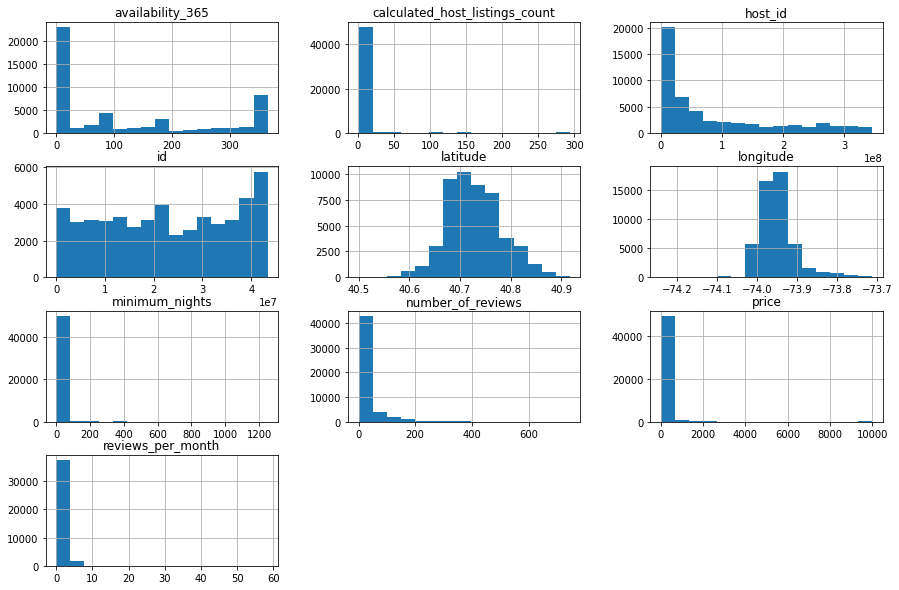

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

Podemos através do DataFrame calcular a média dos preços ds aluguéis na cidade de New York, mas para isso, antes precisamos verificar se nao exitem *outliers*, valores que distorcem nossa percepção gráfica.

Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

>##### * Resumo estatístico por meio do método describe()
>##### * Plotar boxplots para a variável.

In [13]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses de *outliers* como:

* A variável ***price*** possui 75% dos valores abaixo de 175, porém seu valor máximo é de 10000.
* Há aluguéis com quantidade mínima de noites (***minimum_nights***) está acima de 365 dias no ano.

### Boxplot para ***minimum_nights***

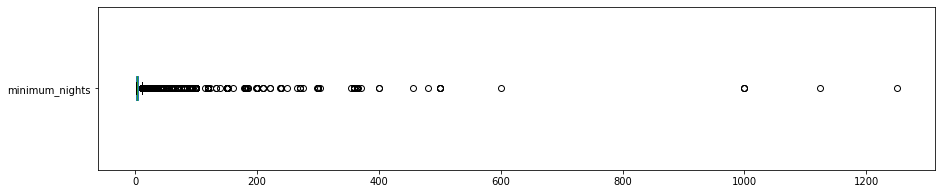

minimum_nights: valores acima de 30:
772 entradas
1.5364%


In [14]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para ***price***

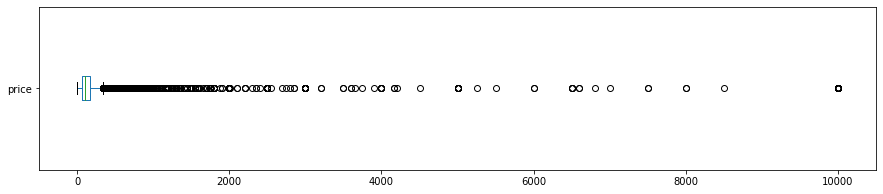


price: valores acima de 1000
323 entradas
0.6428%


In [22]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Histograma sem *outliers*

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

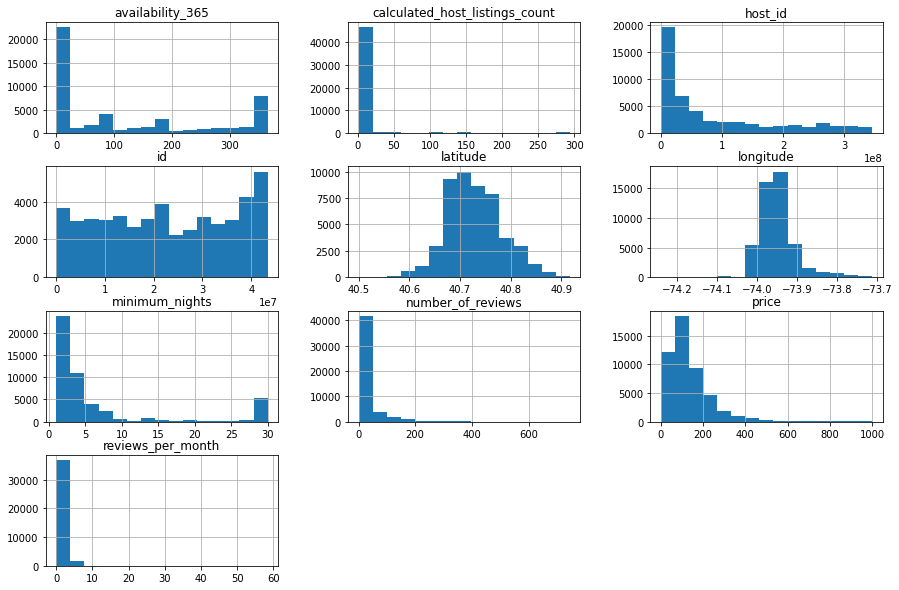

In [23]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Agora com o DataFrame limpo, podemos calcular o valor médio dos aluguéis na cidade com maior acurácia e precisão.

In [61]:
# calcular a média da coluna 'price'
df_pricemean = float(df_clean.price.mean())
print('O valor médio dos aluguéis é de %d dólares por noite' % (df_pricemean)) 


O valor médio dos aluguéis é de 139 dólares por noite


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [34]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025200,-0.050145,-0.035537,0.055608,0.095092
minimum_nights,0.025200,1.000000,-0.141782,-0.179091,0.412692,0.256640
number_of_reviews,-0.050145,-0.141782,1.000000,0.699213,-0.081080,0.191680
reviews_per_month,-0.035537,-0.179091,0.699213,1.000000,-0.064933,0.213368
calculated_host_listings_count,0.055608,0.412692,-0.081080,-0.064933,1.000000,0.170964
availability_365,0.095092,0.256640,0.191680,0.213368,0.170964,1.000000


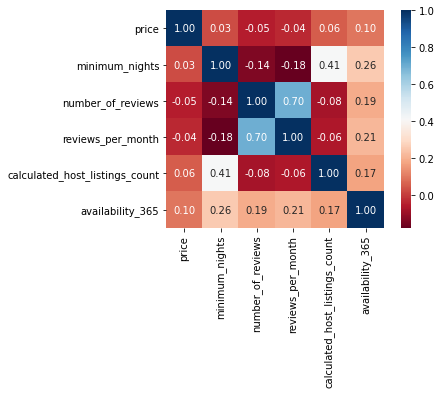

In [38]:
# heatmap da matrix de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

 coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().



In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    25371
Private room       22259
Shared room         1118
Hotel room           432
Name: room_type, dtype: int64

In [42]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.515880
Private room       0.452603
Shared room        0.022733
Hotel room         0.008784
Name: room_type, dtype: float64

* Percebemos por aqui que casa/apt inteiros representam 51% dos imóveis disponiveis e quartos exclusivos representam 45%.

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.



In [65]:
# ver preços por distritos, na média
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10] 

neighbourhood_group
Manhattan        174.782533
Brooklyn         117.371411
Staten Island    100.805479
Queens            93.870036
Bronx             87.825719
Name: price, dtype: float64

### Mapa

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

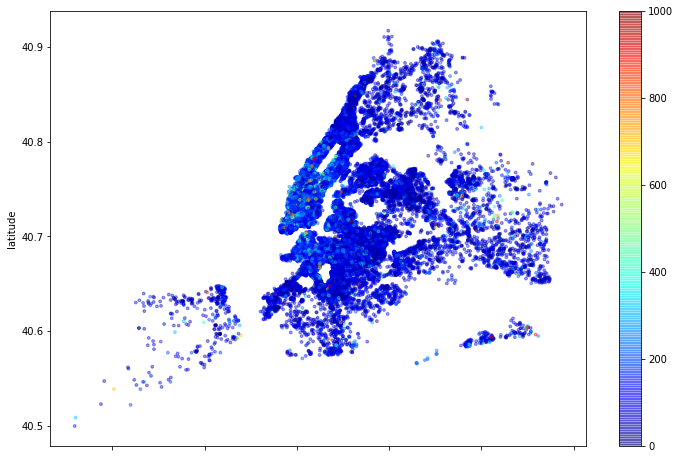

In [46]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/New_York_City_District_Map.png/613px-New_York_City_District_Map.png) 

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


In [62]:
# ver a média da coluna `minimum_nights``
print('O média do mínimo de noites para aluguel é de %d noites' % (df_mnmean))
df_mnmean = int(df_clean.minimum_nights.mean())


O média do mínimo de noites para aluguel é de 6 noites


## Conclusões

* Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

### Com essa análise conseguimos verificar que:

* O preço médio de Airbnb na cidade de New York é de US$139 por noite.
* 51% dos aluguéis são da propriedade inteira e 45% de quartos privados.
* O distrito com aluguel mais caro é Manhattan, seguido do Brooklyn e Statan Island, respectivamente.
* Manhattan também possui a maior quantidade de aluguéis disponíveis na cidade
*  A média do mínimo de noites disponível é de 6 noites.